<a href="https://colab.research.google.com/github/tallwin/Neural-Networks-gas-turbines/blob/main/gas%20turbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("/content/gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

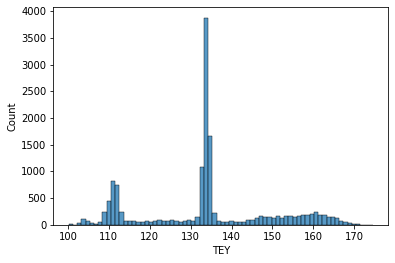

In [6]:
sns.histplot(data['TEY'])

In [7]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [8]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

In [9]:
# Compile model
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# create model
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
estimator = KerasRegressor(build_fn=baseline_model,nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)

print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


Results: -0.23 (0.28) MSE


In [12]:
# Fit the model
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-0.84693027, -0.84513944, -0.8646244 , ..., -0.9347106 ,
       -0.9115287 , -0.8599937 ], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [14]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [15]:
prediction

array([ 1.2013471 , -0.1198623 , -0.39086187, ..., -0.08268519,
        0.32892242,  0.48296344], dtype=float32)

In [16]:
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]

In [17]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [18]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
  tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
  tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
  tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
  tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
  tf.keras.layers.Dense(output_size)
  ])

In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 1s - loss: 2862.7810 - mean_squared_error: 2862.7810 - val_loss: 194.6966 - val_mean_squared_error: 194.6966 - 986ms/epoch - 3ms/step
Epoch 2/100
381/381 - 1s - loss: 103.9805 - mean_squared_error: 103.9805 - val_loss: 76.2795 - val_mean_squared_error: 76.2795 - 509ms/epoch - 1ms/step
Epoch 3/100
381/381 - 1s - loss: 44.9387 - mean_squared_error: 44.9387 - val_loss: 34.1964 - val_mean_squared_error: 34.1964 - 512ms/epoch - 1ms/step
Epoch 4/100
381/381 - 0s - loss: 21.6060 - mean_squared_error: 21.6060 - val_loss: 15.3472 - val_mean_squared_error: 15.3472 - 497ms/epoch - 1ms/step
Epoch 5/100
381/381 - 1s - loss: 10.3089 - mean_squared_error: 10.3089 - val_loss: 6.1315 - val_mean_squared_error: 6.1315 - 530ms/epoch - 1ms/step
Epoch 6/100
381/381 - 1s - loss: 5.1470 - mean_squared_error: 5.1470 - val_loss: 3.4488 - val_mean_squared_error: 3.4488 - 515ms/epoch - 1ms/step
Epoch 7/100
381/381 - 0s - loss: 3.1543 - mean_squared_error: 3.1543 - val_loss: 2.4111 - val_mean

In [20]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.2345 - mean_squared_error: 1.2345


In [21]:
predictions = model.predict_on_batch(X_test_scaled)

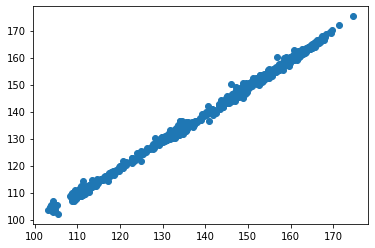

In [22]:
plt.scatter(y_test, predictions)

In [23]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.409607,0.037478
1,111.88,111.596870,0.253065
2,133.72,134.387238,0.498981
3,133.79,132.938431,0.636497
4,110.77,109.978577,0.714474
...,...,...,...
1499,132.85,131.706238,0.860943
1500,125.07,125.027443,0.034027
1501,160.95,160.417236,0.331012
1502,133.12,132.028946,0.819602
